![example](images/director_shot.jpeg)

# Modelling Employee Satisfaction Features

**Authors:** Vince Scacco
***

## Overview

In today's dynamic working environment, understanding and enhancing employee satisfaction stands as a pivotal goal for organizations striving to cultivate productive and engaged workforces. This report delves into the factors that contribute to employee satisfaction within the working society. Through an analysis of diverse datasets sourced from reputable platforms like Kaggle, noticable features can be distinguished surrounding employee contentment and retention. Through regression modeling and other techniques, the analysis explores demographics and workplace dynamics. The goal is to offer actionable insights for improving work environments and boosting organizational success.

## Business Problem

What factors drive employee satisfaction?

## Data Understanding

Data has been sourced from Kaggle and are relevant to the topic of employee retention.

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from scipy.stats import linregress
import matplotlib.dates as mdates
import sqlite3
import scipy.stats as stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel

%matplotlib inline
sns.set_theme(style="whitegrid")

In [2]:
#Visualising the data erd=employee retention data
df_erd1=pd.read_csv('HR_Analytics.csv.csv')
df_erd1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df_erd2 = pd.read_csv('turnover.csv', encoding='latin-1')
df_erd2.head()

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7


In [4]:
df_erd3=pd.read_csv('hr_dashboard_data.csv')
df_erd3.head()

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133


## Data Preparation

In [5]:
#to merge the 3 datasets, I needed to do some cleaning and merge to a common key. I've picked age, which I understand is not ideal
df_erd1.drop(['Attrition', 'BusinessTravel', 'DailyRate', 'DistanceFromHome', 'Education', 
              'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 
              'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'MaritalStatus', 
              'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 
              'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 
              'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 
              'WorkLifeBalance', 'YearsInCurrentRole', 
              'YearsWithCurrManager'], axis=1, inplace=True)
df_erd2.drop(['stag', 'event', 'traffic','coach', 'head_gender', 'greywage', 'way',], axis=1, inplace=True)
df_erd3.drop(['Name','Projects Completed', 'Productivity (%)','Feedback Score','Position','Joining Date', 'Salary'], axis=1, inplace=True)


In [6]:
df_erd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Department               1470 non-null   object
 2   Gender                   1470 non-null   object
 3   JobSatisfaction          1470 non-null   int64 
 4   YearsAtCompany           1470 non-null   int64 
 5   YearsSinceLastPromotion  1470 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 69.0+ KB


This is viable

In [7]:
df_erd2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gender        1129 non-null   object 
 1   age           1129 non-null   float64
 2   industry      1129 non-null   object 
 3   profession    1129 non-null   object 
 4   extraversion  1129 non-null   float64
 5   independ      1129 non-null   float64
 6   selfcontrol   1129 non-null   float64
 7   anxiety       1129 non-null   float64
 8   novator       1129 non-null   float64
dtypes: float64(6), object(3)
memory usage: 79.5+ KB


In [8]:
df_erd2['gender'] = df_erd2['gender'].replace({'m': 'Male', 'f': 'Female'})

# Rename the 'gender' column to 'Gender'
df_erd2.rename(columns={'gender': 'Gender'}, inplace=True)
df_erd2.rename(columns={'age': 'Age'}, inplace=True)
df_erd2.rename(columns={'profession': 'Department'}, inplace=True)
# Convert 'Age' column to integers
df_erd2['Age'] = df_erd2['Age'].astype(int)



In order to make this data match df_erd1, I needed the data to be consistent accross gender and rename columns to match 

In [9]:
df_erd2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Gender        1129 non-null   object 
 1   Age           1129 non-null   int64  
 2   industry      1129 non-null   object 
 3   Department    1129 non-null   object 
 4   extraversion  1129 non-null   float64
 5   independ      1129 non-null   float64
 6   selfcontrol   1129 non-null   float64
 7   anxiety       1129 non-null   float64
 8   novator       1129 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 79.5+ KB


In [10]:
df_erd3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    200 non-null    int64 
 1   Gender                 200 non-null    object
 2   Satisfaction Rate (%)  200 non-null    int64 
 3   Department             200 non-null    object
dtypes: int64(2), object(2)
memory usage: 6.4+ KB


In [11]:
df_erd3.rename(columns={'Satisfaction Rate (%)': 'JobsSatisfaction'}, inplace=True) #renaming to match JobsSatisfaction in df_erd1


In [12]:
df_erd3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               200 non-null    int64 
 1   Gender            200 non-null    object
 2   JobsSatisfaction  200 non-null    int64 
 3   Department        200 non-null    object
dtypes: int64(2), object(2)
memory usage: 6.4+ KB


In [13]:
reordered_dfs = []

#Reordering to make the merging proceess easier
for df in [df_erd1, df_erd2, df_erd3]:
    reordered_df = df[['Age', 'Gender', 'Department'] + [col for col in df.columns if col not in ['Age', 'Gender', 'Department']]]
    reordered_dfs.append(reordered_df)

# Print the first few rows of each reordered DataFrame, checking to see if it's consistent accross all 3
for idx, df in enumerate(reordered_dfs):
    print(f"DataFrame {idx + 1}:")
    print(df.head())
    print()

DataFrame 1:
   Age  Gender              Department  JobSatisfaction  YearsAtCompany  \
0   41  Female                   Sales                4               6   
1   49    Male  Research & Development                2              10   
2   37    Male  Research & Development                3               0   
3   33  Female  Research & Development                3               8   
4   27    Male  Research & Development                2               2   

   YearsSinceLastPromotion  
0                        0  
1                        1  
2                        0  
3                        3  
4                        2  

DataFrame 2:
   Age  Gender  Department         industry  extraversion  independ  \
0   35    Male          HR            Banks           6.2       4.1   
1   33    Male          HR            Banks           6.2       4.1   
2   35  Female          HR  PowerGeneration           6.2       6.2   
3   35  Female          HR  PowerGeneration           5.4       

In [14]:
df_erd1reordered = reordered_dfs[0]
df_erd2reordered = reordered_dfs[1]
df_erd3reordered = reordered_dfs[2]
#I've relabeled each dataset to be able to recall easier

In [15]:
df_erd1reordered.info()
df_erd2reordered.info()
df_erd3reordered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Gender                   1470 non-null   object
 2   Department               1470 non-null   object
 3   JobSatisfaction          1470 non-null   int64 
 4   YearsAtCompany           1470 non-null   int64 
 5   YearsSinceLastPromotion  1470 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 69.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           1129 non-null   int64  
 1   Gender        1129 non-null   object 
 2   Department    1129 non-null   object 
 3   industry      1129 non-null   object 
 4   extraversion  1129 non-null   float64
 5   indepen

It isn't the cleanest and matching, but I've decided to try and merge this using a left merge, where I can keep as much of the data points as posssible, I understand the type of errors this might throw- but sourcing the data was a much more difficult process than I thought.

In [16]:
merged_df = pd.merge(df_erd1, df_erd2, on='Age', how='left')
#Merging the above result with df_erd3 using left join on 'Age'
merged_df = pd.merge(merged_df, df_erd3, on='Age', how='left')

In [17]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387956 entries, 0 to 387955
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Age                      387956 non-null  int64  
 1   Department_x             387956 non-null  object 
 2   Gender_x                 387956 non-null  object 
 3   JobSatisfaction          387956 non-null  int64  
 4   YearsAtCompany           387956 non-null  int64  
 5   YearsSinceLastPromotion  387956 non-null  int64  
 6   Gender_y                 387878 non-null  object 
 7   industry                 387878 non-null  object 
 8   Department_y             387878 non-null  object 
 9   extraversion             387878 non-null  float64
 10  independ                 387878 non-null  float64
 11  selfcontrol              387878 non-null  float64
 12  anxiety                  387878 non-null  float64
 13  novator                  387878 non-null  float64
 14  Gend

In [18]:
merged_df.drop(['Department_y','Gender_y','Department_x','Gender_x'],axis=1, inplace=True)

#Remove duplicates from merged_df, reduces error
merged_df.drop_duplicates(inplace=True)

In [19]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 270874 entries, 0 to 387675
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Age                      270874 non-null  int64  
 1   JobSatisfaction          270874 non-null  int64  
 2   YearsAtCompany           270874 non-null  int64  
 3   YearsSinceLastPromotion  270874 non-null  int64  
 4   industry                 270801 non-null  object 
 5   extraversion             270801 non-null  float64
 6   independ                 270801 non-null  float64
 7   selfcontrol              270801 non-null  float64
 8   anxiety                  270801 non-null  float64
 9   novator                  270801 non-null  float64
 10  Gender                   269302 non-null  object 
 11  JobsSatisfaction         269302 non-null  float64
 12  Department               269302 non-null  object 
dtypes: float64(6), int64(4), object(3)
memory usage: 28.9+ MB


In [20]:
merged_df.drop(merged_df.columns[1], axis=1, inplace=True)

In [21]:
merged_df.head()

,Age,YearsAtCompany,YearsSinceLastPromotion,industry,extraversion,independ,selfcontrol,anxiety,novator,Gender,JobsSatisfaction,Department
0,41,6,0,Banks,3.8,8.4,2.6,4.8,7.5,Female,36.0,Marketing
1,41,6,0,Banks,3.8,8.4,2.6,4.8,7.5,Female,38.0,Sales
2,41,6,0,Banks,3.8,8.4,2.6,4.8,7.5,Male,18.0,Sales
3,41,6,0,Banks,3.8,8.4,2.6,4.8,7.5,Female,56.0,IT
4,41,6,0,Banks,3.8,8.4,2.6,4.8,7.5,Male,74.0,Marketing


In [22]:
#This is the masterdataset I will base my report on 

## Data Modeling

In [23]:
#running an SQL code to check what departments are present in the data
conn = sqlite3.connect(':memory:')


merged_df.to_sql('merged_df', conn)

cur = conn.cursor()

cur.execute("SELECT DISTINCT Department FROM merged_df")

departments = cur.fetchall()
print(departments)

[('Marketing',), ('Sales',), ('IT',), ('Finance',), ('HR',), (None,)]


In [24]:
#also running another SQL line to check what ages are present in the data before deciding how to proceed
cur.execute("SELECT MIN(Age) AS Min_Age, MAX(Age) AS Max_Age FROM merged_df")
age_range = cur.fetchone()
print("Minimum Age:", age_range[0])
print("Maximum Age:", age_range[1])


Minimum Age: 18
Maximum Age: 60


In [25]:
#Labelling reorded dataseets
dfs = [('df_erd1reordered', df_erd1reordered), ('df_erd2reordered', df_erd2reordered), ('df_erd3reordered', df_erd3reordered)]
    

In [26]:
#Now just having a look in general which direction to take the analysis
for df_name, df in dfs:
    print(f"Exploratory Data Analysis for DataFrame: {df_name}\n")
    
    
    print("1. Basic Statistics:")
    print(df.describe())
    print("\n")
    print("2. Missing Values:")
    print(df.isnull().sum())
    print("\n")

Exploratory Data Analysis for DataFrame: df_erd1reordered

1. Basic Statistics:
               Age  JobSatisfaction  YearsAtCompany  YearsSinceLastPromotion
count  1470.000000      1470.000000     1470.000000              1470.000000
mean     36.923810         2.728571        7.008163                 2.187755
std       9.135373         1.102846        6.126525                 3.222430
min      18.000000         1.000000        0.000000                 0.000000
25%      30.000000         2.000000        3.000000                 0.000000
50%      36.000000         3.000000        5.000000                 1.000000
75%      43.000000         4.000000        9.000000                 3.000000
max      60.000000         4.000000       40.000000                15.000000


2. Missing Values:
Age                        0
Gender                     0
Department                 0
JobSatisfaction            0
YearsAtCompany             0
YearsSinceLastPromotion    0
dtype: int64


Exploratory Data 

3. Distribution Plots:


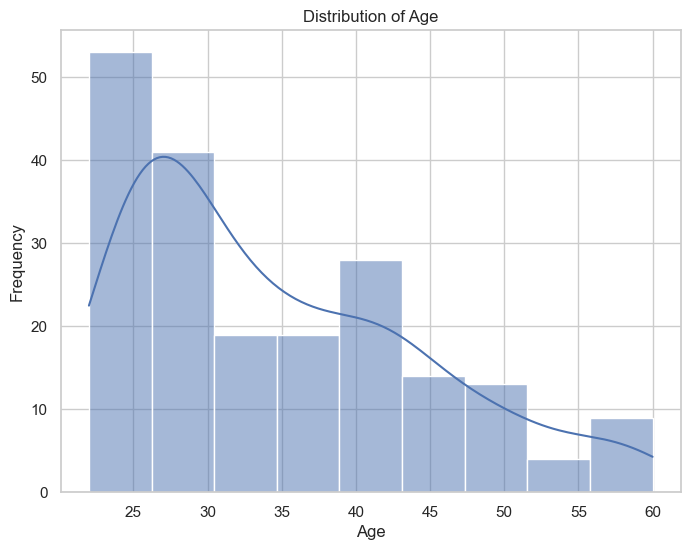

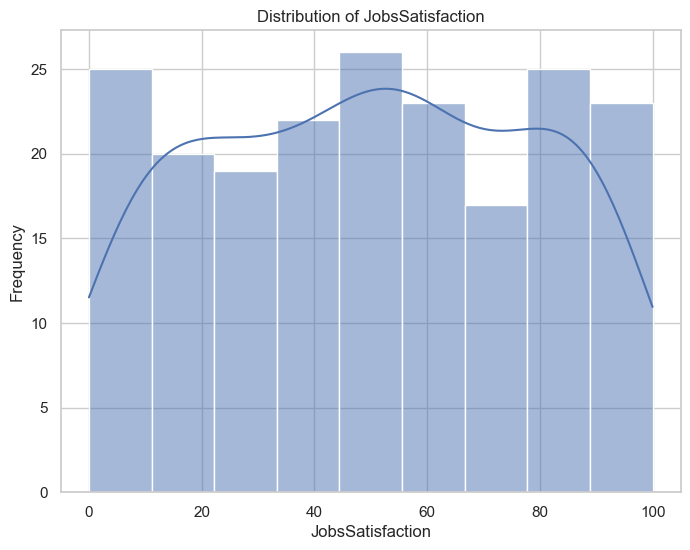

In [27]:
print("3. Distribution Plots:")
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

4. Bar Charts for Categorical Columns:


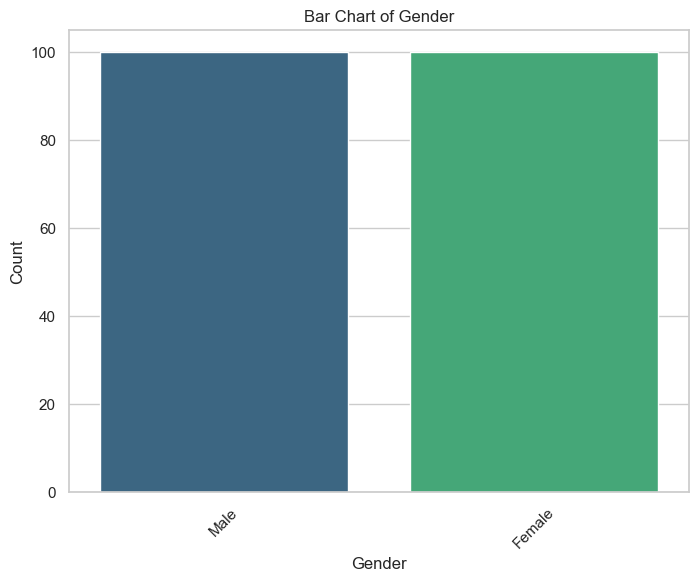

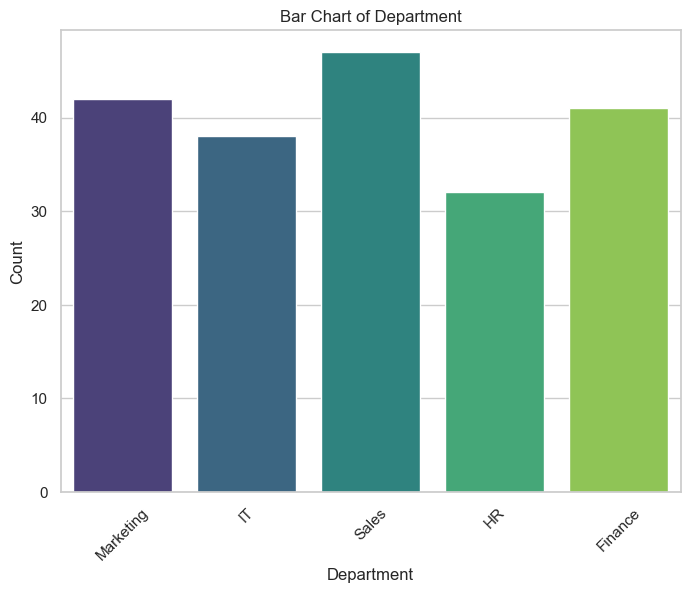

In [28]:

    print("4. Bar Charts for Categorical Columns:")
    categorical_columns = df.select_dtypes(include=['object']).columns
    for column in categorical_columns:
        plt.figure(figsize=(8, 6))
        sns.countplot(data=df, x=column, palette='viridis')
        plt.title(f"Bar Chart of {column}")
        plt.xlabel(column)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()
    
    print("\n\n")


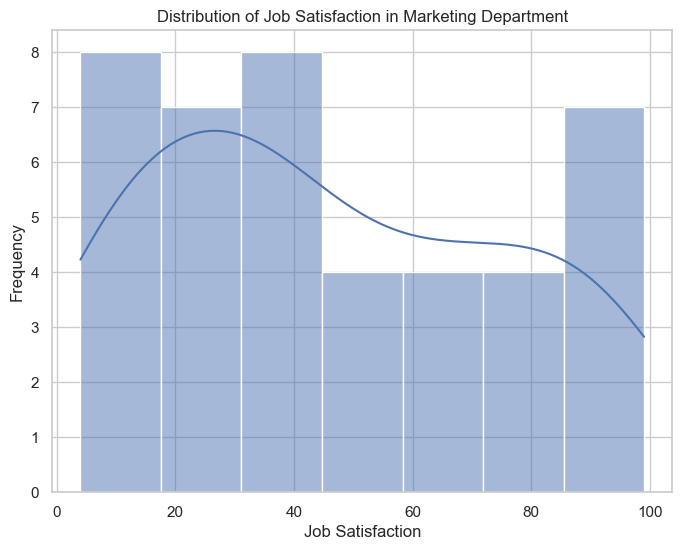

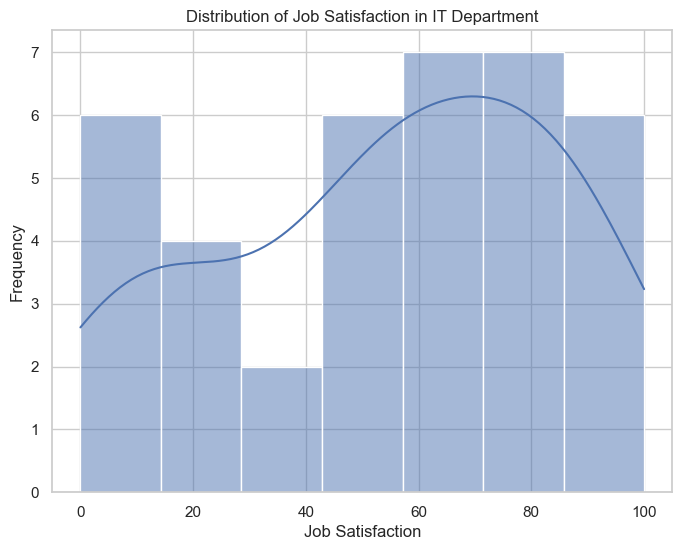

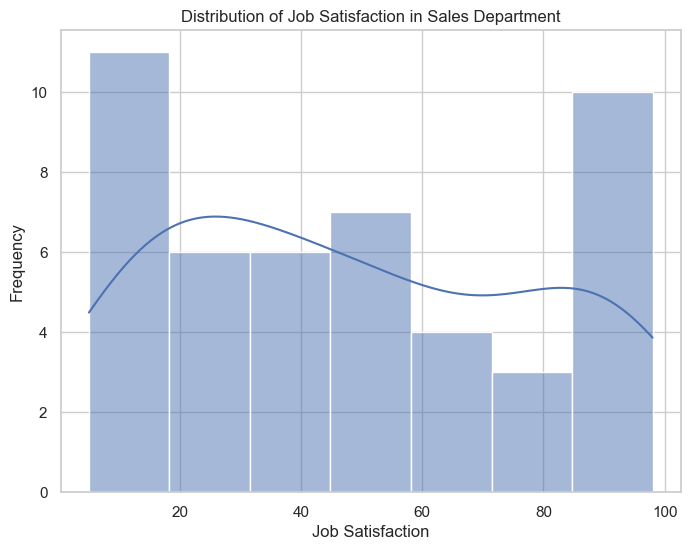

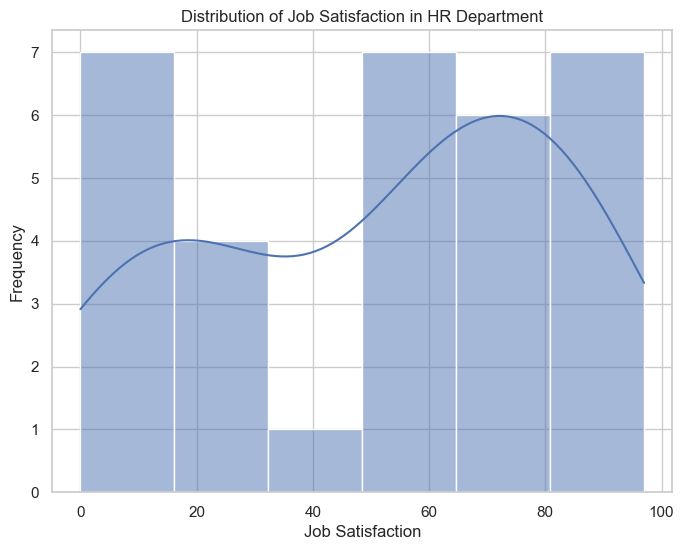

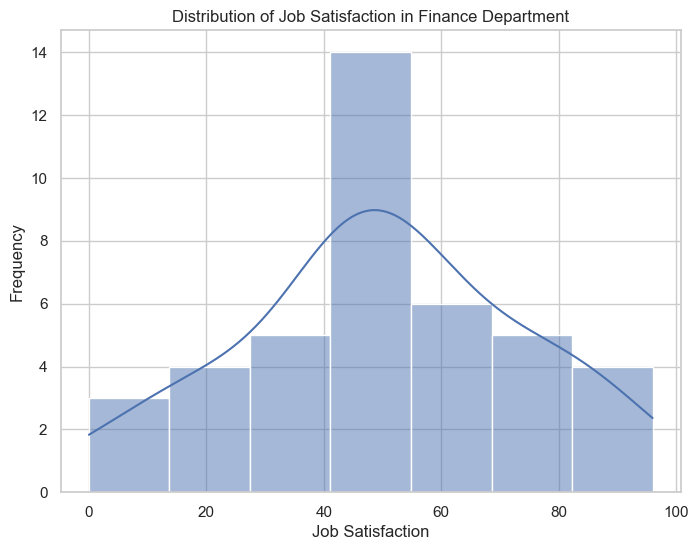

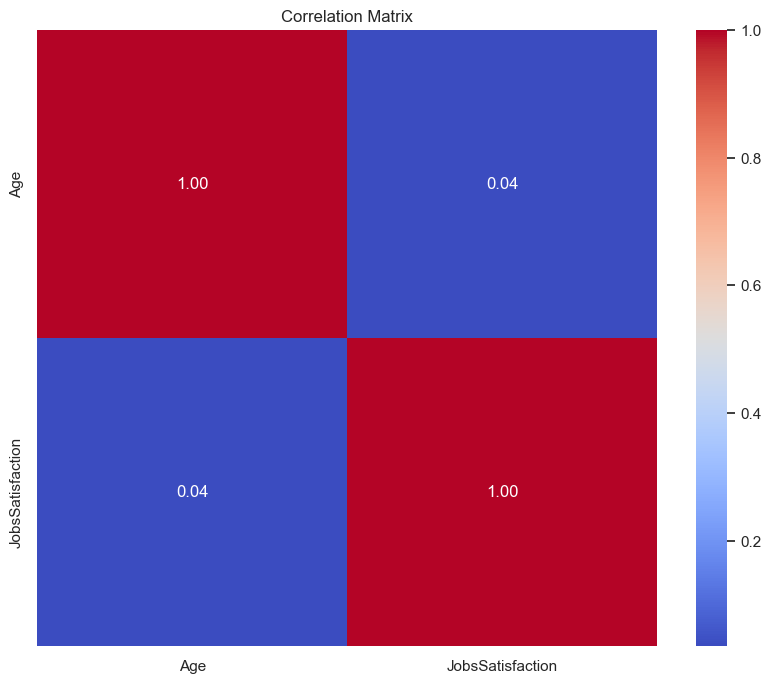

In [29]:
#Inferential statistics is the most likely path as the data is more categorical, and unlikely to produce any predictive results
departments = df['Department'].unique()
for department in departments:
    # Filter data for the current department
    department_data = df[df['Department'] == department]
    
    # Plot distribution of job satisfaction within the department
    plt.figure(figsize=(8, 6))
    sns.histplot(department_data['JobsSatisfaction'], kde=True)
    plt.title(f"Distribution of Job Satisfaction in {department} Department")
    plt.xlabel("Job Satisfaction")
    plt.ylabel("Frequency")
    plt.show()

numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Multicollinearity analysis
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

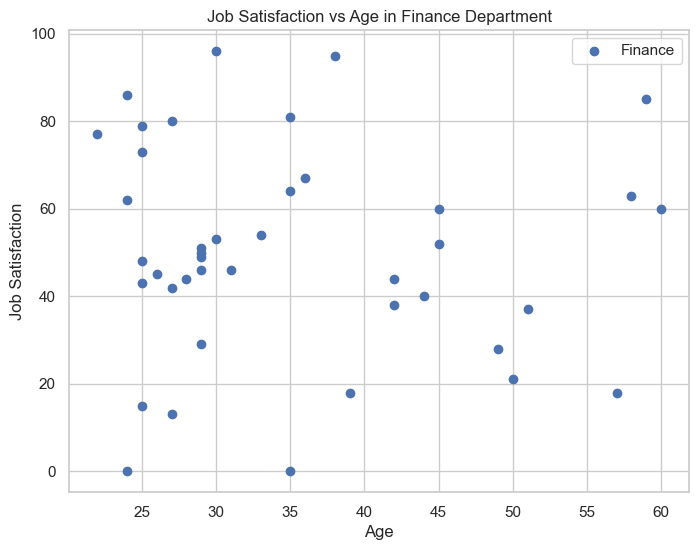

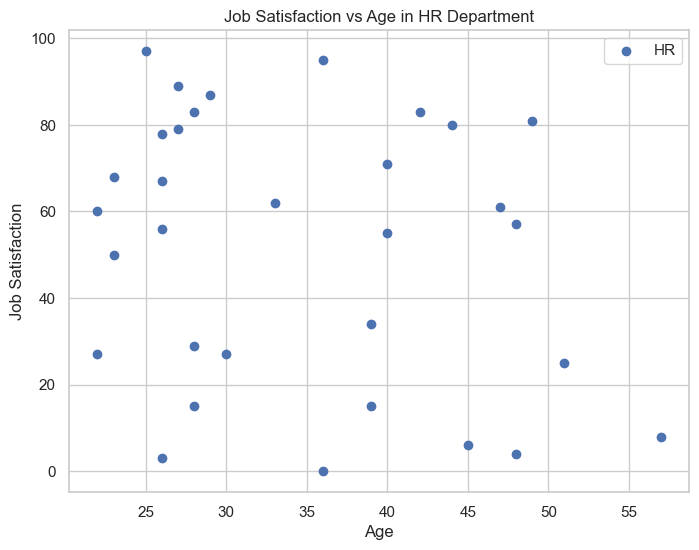

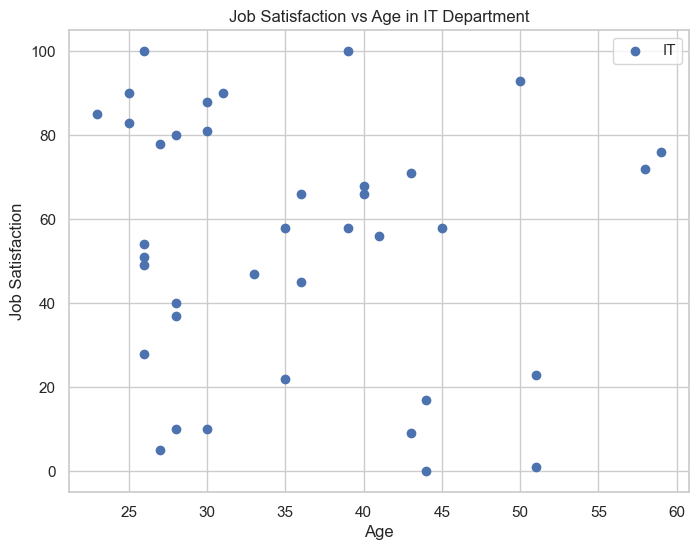

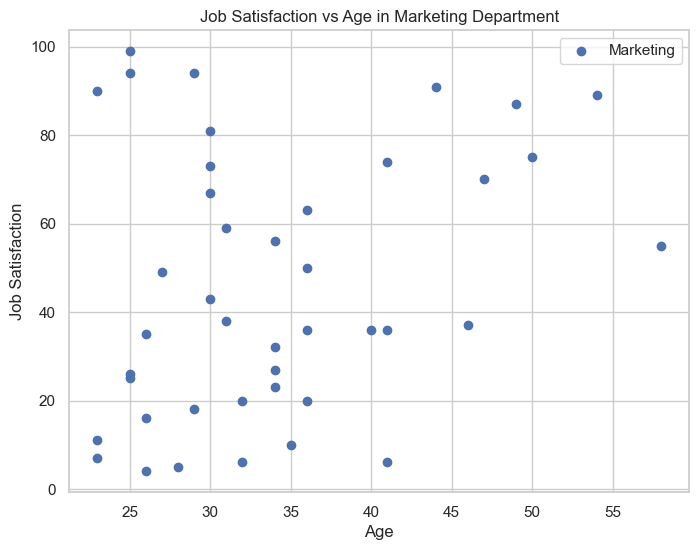

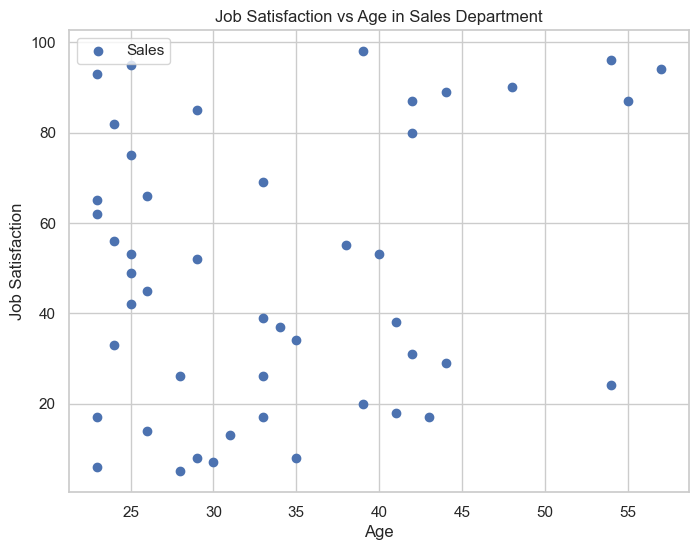

In [30]:
import matplotlib.pyplot as plt

for department, department_data in df.groupby('Department'):

    age = department_data['Age']    # Extract age and job satisfaction values for the current department
    jobs_satisfaction = department_data['JobsSatisfaction']
    
    plt.figure(figsize=(8, 6))
    plt.scatter(age, jobs_satisfaction, label=department)
    
    # Visualise
    plt.title(f'Job Satisfaction vs Age in {department} Department')
    plt.xlabel('Age')
    plt.ylabel('Job Satisfaction')
    plt.legend()
    plt.show()

In [34]:

# Stepwise
selector = SelectFromModel(LinearRegression())
selector.fit(X, y)
selected_features = X.columns[selector.get_support()]

# Recursive Feature Elimination with Linear Regression
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=8)
selector.fit(X, y)
selected_features = X.columns[selector.support_]

X_selected = X[selected_features]
model = sm.OLS(y, X_selected).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       JobsSatisfaction   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.4175
Date:                Wed, 28 Feb 2024   Prob (F-statistic):              0.867
Time:                        16:23:43   Log-Likelihood:                -955.00
No. Observations:                 200   AIC:                             1924.
Df Residuals:                     193   BIC:                             1947.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Age                      0.0750      0.213      0.353      0.725      -0.344       0.494
Gender_Female           35.4338      6.030      5.876      0.000      23.540      47.328
Gender_Male             32.4576      5.685      5.709      0.000      21.244      43.671
Department_Finance      13.7188      4.716      2.909      0.004       4.417      23.021
Department_HR           14.8000      5.066      2.921      0.004       4.808      24.792
Department_IT           17.9642      4.874      3.686      0.000       8.351      27.578
Department_Marketing     9.3096      4.539      2.051      0.042       0.357      18.262
Department_Sales        12.0988      4.348      2.783      0.006       3.524      20.674
==============================================================================
Omnibus:                       55.424   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.150
Skew:                          -0.020   Prob(JB):                      0.00625
Kurtosis:                       1.897   Cond. No.                     5.07e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.01e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

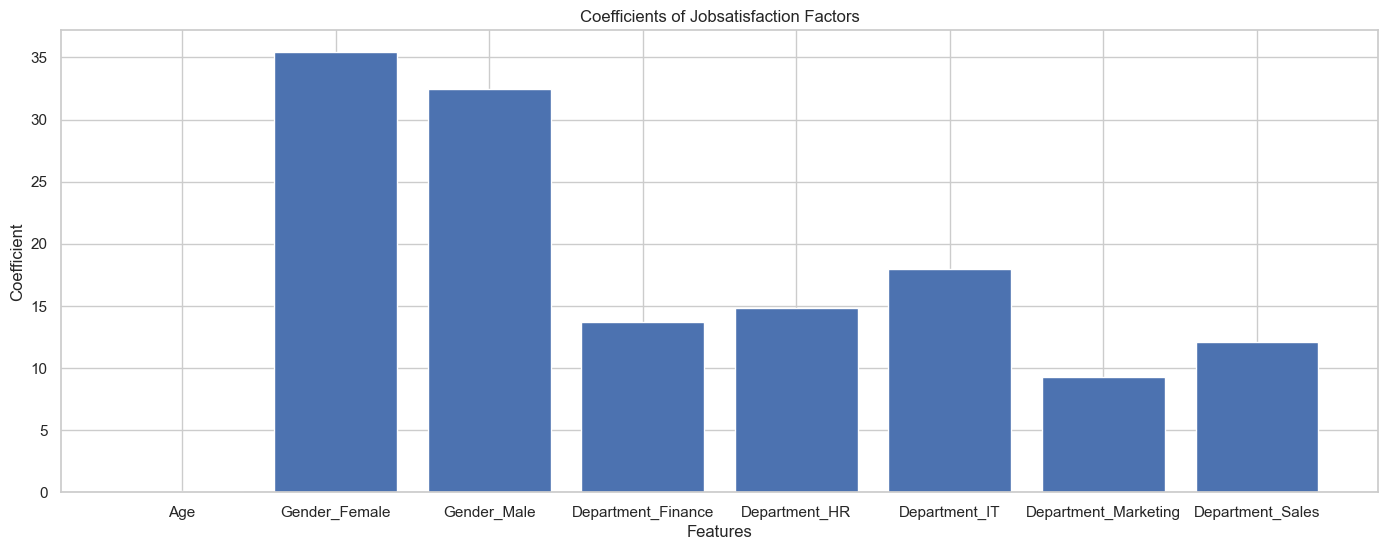

In [35]:
#visualising what the stepwise and RFE results produced
plt.figure(figsize=(17, 6))
plt.bar(X_selected.columns[0:], model.params[0:])  # Exclude the intercept
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Coefficients of Jobsatisfaction Factors')
plt.show()

## Evaluation
Based on the models and visuals produced from this report, that age, genders and departments do have an influence on an employee's satsifaction level within in the job. This can be seen in the "Coefficients of Jobsatifaction" histogram, where females seems to have the leading effect on employee satisfaction, with a coefficient of 35.43.

A business can also loook at this data and notice the positive coefficients present in the department datas are significant, with all p-values being less than 0.05 and that any negative or positive trends present does have an impact on the contemptment of employees. 

This data also shows that sales had the most responses from the "Bar Chart of Department" plot, yet also had more negative responses.

## Conclusions
There are lots of factors that drive employees to either leave or stay in a business, but it's important to notice where empoloyee satisfaction lies. Using inferencial statistical methods, this data tends to suggest that females are happier, and people working in the IT department are also happier. Where concerns should lie is that sales had the most responses, yet their distribution of responses tend to lie on the negative side, with a p-value of 0.006, it's important to note that more dissatisfaction lies in sales according to this data. 

Specific company business should be used to analyse employee satisfaction, as this data can be too general, and hard to merge especially when it's across multiple businesses. It's hard to merge data without a unique common key, as this data was merged using the 'Age' key. Data should have been found on specific companies, that way it was more likely to find a better primary key. The analysis performed did provide insights, and did produce some significant results.